In [1]:
#Import bibliotek 
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym    

pamiętaj o <mark>___Shift + Enter___</mark>

In [2]:
# Jaki  będzie wynik tej operacji
0.5 + 0.5 + 0.5 == 1.5

True

***
# Teoria błędów

## Wprowadzenie

W obliczeniach często zamiast dokładnych wartości liczb stosujemy ich przybliżone wartości. Jeżeli przez $\tilde x$ oznaczymy wartość przybliżoną liczby dokładnej $x$ to __błąd bezwzględny__ tego przybliżenia z definicji jest równy:
$$\Delta_x = |x- \tilde x|$$, 
a __błąd względny__:
$$\delta_x = |\dfrac{x- \tilde x}{x}| = \dfrac{\Delta_x}{x}$$

Przykład 1. 

$x = 2.684$, $\tilde x = 3$. 

Zatem 

$$\Delta_x = |x - \tilde x| =  0.316$$

$$\delta_x = \dfrac{\Delta_x}{|x|} = 0.117735 \approx 11.77\% $$

Przykład 2. 

$x = 10002.684$, $\tilde x = 10003$. 

Zatem 

$$\Delta_x = |x - \tilde x| =  0.316$$

$$\delta_x = \dfrac{\Delta_x}{|x|} = 0.0000315915 \approx 0.00316\%$$

W praktyce na ogół nie znamy dokładnych wartości błędu bezwzględnego <mark> $\Delta_x $ </mark> i względnego i korzystamy z oszacowań tych błędów <mark> $\Delta x$ </mark> : 
$$\Delta_x \leq \Delta x$$
$$\delta_x \leq \delta x$$
Oszacowanie liczby $x$ dla błędu bezwzględnego zapiszemy:
$$\tilde x - \Delta x \leq x \leq \tilde x + \Delta x$$

Przy szacowaniu błędu bezwzględnego i względnego, jeżeli trzeba zaokrąglić daną liczbę, to <u>zawsze dokonujemy zaokrąglenia __w górę__ </u>.

### Błąd wartości funkcji

Niech dana będzie funkcja różniczkowalna $f$ i niech $\Delta x$ będzie błędem bezwzględnym argumentu tej funkcji.

Chcemy wyznaczyć błąd bezwzględny i względny wartości funkcji 
$$y =f(x)$$
, gdy znane jest oszacowanie błędu $\Delta x$ jej argumentu.

Dla dostatecznie małych wartości $(\tilde x-x)$ mamy:
$$f(\tilde x) \approx f(x) + f'(x)(\tilde x-x)$$
Zatem,
$$\Delta_f \approx |f'|\cdot  \Delta_x $$
oraz 
$$\delta_f \approx \dfrac{\Delta_f}{|f|}$$

Przechodząc na oszacowanie błędu bewzględnego i względnego argumentu otrzymujemy:  
oszacowanie błędu __bezwzględnego__ funkcji $f$  
$$\Delta f = |f'| \cdot \Delta x$$  
i b ledu __względnego__ funkcji $f$
$$\delta f = \dfrac{\Delta f}{|f|}$$

Analogicznie w przypadku funkcji wielu zmiennych $z=f(x,y)$ i oszacowania błedów bezwzględnych argumentów $\Delta x$, $\Delta y$ otrzymujemy następujące wzory na oszacowanie błedów bezwzględnego i względnego wartości funkcji $f$
$$\Delta f = |\dfrac{\partial f}{\partial x} (x,y)| \cdot \Delta x + |\dfrac{\partial f}{\partial y} (x,y)| \cdot \Delta y$$
$$\delta f = \dfrac{\Delta f}{|f(x,y)|}$$

## Podsumowanie oszacowań błędów

#### Błąd bezwzględny wartości argumentu : $ \qquad \Delta x $

#### Błąd bezwzględny wartości funkcji :  $ \qquad \quad \Delta f = |f'(x)| \cdot \Delta x$

#### Błąd względny argumentu : $  \qquad \qquad \qquad  \delta x = \dfrac {\Delta x}{|x|} $

#### Błąd względny wartości funkcji :  $\qquad \qquad   \delta f = \dfrac{\Delta f}{|f(x)|}$
#### <u>Wskaźnik uwarunkowania</u> : $\qquad \qquad \qquad  C(x) = | \dfrac{x \cdot f'(x)}{f(x)} |$

Zauważmy, że $\delta f = \dfrac{\Delta f}{|f(x)|} = \dfrac{|f'(x)| \cdot \Delta x}{|f(x)|} = \dfrac{|f'(x)| \cdot \delta x \cdot {|x|}}{|f(x)|} =| \dfrac{x \cdot f'(x)}{f(x)} | \cdot \delta x = C(x) \cdot \delta x $

#### <u>Wskaźnik uwarunkowania (funkcja wielu zmiennych)</u>
$$C_x = |\dfrac{x \cdot \frac{\partial f}{\partial x} (x,y)}{f(x,y)}|$$
$$C_y = |\dfrac{y \cdot \frac{\partial f}{\partial y} (x,y)}{f(x,y)}|$$

Zauważmy, że $\delta f = C_x \cdot \delta x + C_y \cdot \delta y $

### Nazwy zmiennych przyjęte w `Python`

> zmienną $\Delta f$ będziemy oznaczać `D_f`  a zmienną  $\Delta x $  przez `D_x` &nbsp; &nbsp; &nbsp; (bezwględne)  
> zmienną $\delta f$ będziemy oznaczać `d_f` oraz analogicznie $\delta x $ przez `d_x`&nbsp; &nbsp; &nbsp;  (względne)
>
> pochodne f'(x)  f''(x)  f'''(x) odpowiednio `f_p1` `f_p2` `f_p3`


***
## Zadanie 1
Wyznaczyć błąd __bezwględny__ i __względny__ jaki popełniamy przy obliczaniu wartości funkcji jednej zmiennej:

$$f(x) = \dfrac{1}{1+x^2}$$ 

w punkcie $x = 1.38$ (wiadomo, że argument obarczony jest błędem __bezwzględnym__ $\Delta x = 0.03$). 

Dodatkowo:
1. sprawdzić czy zadanie jest dobrze uwarunkowane,
2. zbadać uwarunkowanie zadania dla dowolnych argumentów,
3. dla jakich argumentów wskaźnik nie przekracza wartości $1$,
4. narysować wykres wskaźnika uwarunkowania w przedziale $[-5,5]$.

### Wczytanie danych zadania

In [3]:
# Zdefiniowanie funkcji  f(x)
x = sym.Symbol('x')      # od tej pory x traktowane jest jako symbol
sym_f = 1/(x**2 + 1)     # funkcja f(x) ale SYBMOLICZNIE
D_x = 0.03               # błąd bezwzględny argumentu
sym_f                    # Wyświetlenie wzoru symbolicznego

1/(x**2 + 1)

### Obliczenia

In [4]:
# Obliczenie pochodnej funkcji f:
sym_f_p1 = sym.diff(sym_f, x)   # symboliczne obliczenie pochodnej, w tym miejscu korzystamy z biblioteki sympy
sym_f_p1                    # i wyświetlenie pochodnej

-2*x/(x**2 + 1)**2

In [5]:
# Policzenie błędów  - wszystko symbolicznie -
sym_d_x = sym.simplify(D_x / abs(x))          # błąd względny argumentu
sym_D_f = sym.simplify(abs(sym_f_p1) * D_x)   # błąd bezwzględny funkcji
sym_d_f = sym.simplify(sym_D_f / abs(sym_f))  # błąd względny funkcji
sym_C = sym.simplify(abs((x*sym_f_p1)/sym_f))        # wskaźnik uwarunkowania z użyciem funkcji bibliotecznej simplify
sym_C

2*Abs(x**2/(x**2 + 1))

In [6]:
# wyświetl co chcesz tylko dobrze podstaw do zmiennej showItem
showItem = sym_D_f
# print(showItem)
showItem

0.06*Abs(x/(x**2 + 1)**2)

Zauważmy, że funkcje sym_d_x, sym_D_f, sym_d_f, sym_C zdefiniowane wyżej są zapisane w formie symbolicznej tzn. <u> nie mogę na razie policzyć np sym_d_f(1) </u>

In [7]:
sym_d_f(1)

TypeError: 'Mul' object is not callable

__Zmiana z funkcji symbolicznych na numeryczne__   
użycie funkcji <mark>__lambdify__</mark> do utworzenia wzorów _"numerycznych"_ ze wzorów _"symbolicznych"_

In [8]:
D_f = sym.lambdify(x, sym_D_f)   
d_f = sym.lambdify(x, sym_d_f)
d_x = sym.lambdify(x, sym_d_x)
C = sym.lambdify(x, sym_C)
# teraz symbole D_f, d_f, d_x, C traktowane są jako funkcje jednej zmiennej

In [9]:
# Teraz możemy policzyć wartość funkcji d_f:
d_f(2)

0.024

### Wyniki

In [10]:
# Odpowiedź: błąd bezwzględny i względny obliczonej funkcji w punkcie x=1.38
x = 1.38
print("dla x=", x, "BŁĄD: bezwzględny D_f(x)=", D_f(x), "względny d_f(x)=", d_f(x), "\nwsk. uwarunk C(x)=", C(x))

dla x= 1.38 BŁĄD: bezwzględny D_f(x)= 0.009815614208692399 względny d_f(x)= 0.028508469907726208 
wsk. uwarunk C(x)= 1.3113896157554055


Odpowiedź 1: Wskaźnik uwarunkowania jest bliski 1, zatem zadanie dla danego argumentu $x$ jest dobrze uwarunkowane.

Odpowiedź 2: 
Zgodnie z otrzymanym wzorem na wskaźnik uwarunkowania:

In [11]:
sym_C


2*Abs(x**2/(x**2 + 1))

Wskaźnik uwarunkowania przyjmuje najmniejszą wartość 0 dla argumentu $x=0$, oraz przy $x \rightarrow \infty$ dąży do wartości 2. 
Zatem zadanie jest dobrze uwarunkowane dla $x \in \mathbb{R}$.

Odpowiedź 3: Chcemy znaleźć takie $x$, że $C(x)<1$. Z tego wynika, że musi być spełniona nierówność  $x^2 <= 1$. Zatem wskaźnik uwarunkowania nie przekracza wartości 1, dla argumentów $x \in [-1,1]$.

#### Wykres wskaźnika uwarunkowania

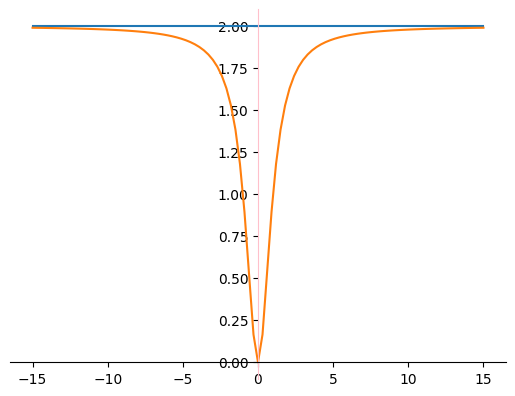

In [12]:
#s = np.arange(-5, 5.01, 0.01)
s = np.linspace(-15, 15, 101)    #  podział przedziału na 100 równych części (odcinków)

Cval = C(s)                    # policzenie wartości C dla wszystkich punktów podziału
C2=Cval*0+2

# tu są niektóre przydatne opcje rysunku
fig = plt.figure()                      # def. obiektu figury
axy = fig.add_subplot(1, 1, 1)          # def. osi - ramki rysunku 
axy.spines.left.set_position('zero')    # gdzie ma być wyświetlona  left
axy.spines.left.set_color('pink')       # w jakim kolorze           left
axy.spines.bottom.set_position('zero')  #                           bottom
axy.spines.right.set_visible(False)     # czy ma być wyświetlona    right
axy.spines.top.set_visible(False)       #                           top 
# koniec opcji
plt.plot(s, C2)                  # narysowanie granicy zbieżności wskaźnika uwarunkowania
plt.plot(s, Cval)                # narysowanie wykresu - dla współrzędnych s wartości Cval

plt.show()                       # wyświetlenie wykresu na ekranie